Часть материала украдена из курса "Глубинное обучение" ФКН ВШЭ https://www.hse.ru/ba/ami/courses/205504078.html, за что им большое спасибо.

Актуальная версия этого ноутбука обретается по адресу
https://github.com/nadiinchi/dl_labs/blob/master/lab_pytorch.ipynb

# Устанавливаем pytorch

## Linux/OSX


На оффсайте http://pytorch.org/ надо выбрать подходящую конфигурацию и скачать.

Версию python можно узнать в терминале:
```
python --version
```


## Windows without GPU

Проще всего поставить при помощи конды:
```
conda install -c peterjc123 pytorch
```

## Windows with GPU

Смотрите https://github.com/peterjc123/pytorch-scripts

![img](https://s1.postimg.org/6fl45xnvnj/pytorch-logo-dark.png)

In [1]:
import torch
import numpy as np

In [2]:
# numpy world

x = np.arange(16).reshape(4, 4)

print("X :\n %s" % x)
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n", np.dot(x, x.T))
print("mean over cols :\n%s" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s" % (np.cumsum(x, axis=0)))

X :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X*X^T  :
 [[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over cols :
[ 1.5  5.5  9.5 13.5]
cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]


In [3]:
# pytorch world

x = np.arange(16).reshape(4, 4)

y = torch.from_numpy(x)
print('Type of y:', type(y))
y = torch.from_numpy(x).type(torch.FloatTensor)
print('Type of y', type(y))

Type of y: <class 'torch.Tensor'>
Type of y <class 'torch.Tensor'>


In [6]:
x = torch.arange(0,16).view(4,4)
print('Type of x:', type(x))

print("X :\n%s" % x)
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n", torch.matmul(x, x.transpose(1, 0)))
print("mean over cols :\n", torch.mean(x, dim=-1))
print("cumsum of cols :\n", torch.cumsum(x, dim=0))

Type of x: <class 'torch.Tensor'>
X :
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])
add 5 :
tensor([[ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16],
        [17, 18, 19, 20]])
X*X^T  :
 tensor([[ 14,  38,  62,  86],
        [ 38, 126, 214, 302],
        [ 62, 214, 366, 518],
        [ 86, 302, 518, 734]])


RuntimeError: Can only calculate the mean of floating types. Got Long instead.

## NumPy vs Pytorch

Numpy и Pytorch не требуют описания статического графа вычислений. 

Можно отлаживаться с помощью pdb или просто print.

API несколько различается:

```
x.reshape([1,2,8]) -> x.view(1,2,8)
x.sum(axis=-1) -> x.sum(dim=-1)
x.astype('int64') -> x.type(torch.LongTensor)
```


Легко конвертировать между собой:

```
torch.from_numpy(npx) -- вернет Tensor
tt.numpy() -- вернет Numpy Array
```


Если что:
- смотрите документацию
- гуглите (Stackoverflow/tutorials)

In [12]:
x = torch.linspace(0, 2 * np.pi, 16)

# Mini-task: compute a vector of sin^2(x) + cos^2(x)
out = torch.sin(x)**2 + torch.cos(x)**2

print(out.numpy())

[1.         1.         0.9999999  1.         0.9999999  1.
 0.99999994 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [9]:
x

tensor([0.0000, 0.4189, 0.8378, 1.2566, 1.6755, 2.0944, 2.5133, 2.9322, 3.3510,
        3.7699, 4.1888, 4.6077, 5.0265, 5.4454, 5.8643, 6.2832])

## In-place operations

Когда работаем с большими массивами, память надо экономить.
Некоторые операции происходят с созданием нового объекта – результата вычислений,
некоторые изменяют данный объект (in-place операции).
В pytorch обычно эти операции различаются добавлением подчеркивания:
```
x.exp()   # not-in-place operation
x.exp_()  # in-place operation
```

In [6]:
x = torch.arange(4)
print('Not-in-place:')
print('\tx.exp():\t\t', x.exp().numpy())
print('\tx:\t\t\t', x.numpy())
print('In-place:')
print('\tx.exp_():\t\t', x.exp_().numpy())
print('\tx after x.exp_():\t', x.numpy())

Not-in-place:
	x.exp():		 [  1.           2.71828175   7.38905621  20.08553696]
	x:			 [ 0.  1.  2.  3.]
In-place:
	x.exp_():		 [  1.           2.71828175   7.38905621  20.08553696]
	x after x.exp_():	 [  1.           2.71828175   7.38905621  20.08553696]


In [7]:
x = torch.arange(0, 4).view(2, 2)
y = torch.arange(4, 8).view(2, 2)
z = torch.arange(8, 12).view(2, 2)

# Not-in-place:
u = x + 2 * y - z    # 3 array allocations?
print(u.numpy())

# In-place
u = y.clone()        # 1 array allocation
u.mul_(2)
u.add_(x)
u.sub_(z)
print(u.numpy())

[[ 0.  2.]
 [ 4.  6.]]
[[ 0.  2.]
 [ 4.  6.]]


## Broadcasting на pytorch (аналогично numpy)

In [17]:
a = torch.Tensor([1, 1, 1, 2]).view(4, 1)
b = torch.Tensor([1, 0, 1, 0]).view(4, 1)
c = torch.randn(16).view(4, 4)
#print('a:', a)
print('b:', b)
#print('a + b:', a + b)
print('c:', c)
print('b + c:', b + c)

b: tensor([[1.],
        [0.],
        [1.],
        [0.]])
c: tensor([[-0.9896, -0.5006,  0.3738,  0.2424],
        [ 0.5608, -0.7114,  0.5221,  2.1434],
        [-0.9807, -0.5838,  0.1753,  0.2581],
        [-1.1661, -0.7064,  1.2918,  1.1869]])
b + c: tensor([[ 0.0104,  0.4994,  1.3738,  1.2424],
        [ 0.5608, -0.7114,  0.5221,  2.1434],
        [ 0.0193,  0.4162,  1.1753,  1.2581],
        [-1.1661, -0.7064,  1.2918,  1.1869]])


Более подробную информацию можно найти на http://pytorch.org/docs/master/notes/broadcasting.html

## Работа с тензорами

Дано 100 объектов, каждый из которых описывается 10-мерным вектором, и 5 точек, каждая из которых также задается 10-мерным вектором. Объекты лежат в матрице X, точки – в матрице Y.

Надо для каждого объекта из X найти индекс ближайшей точки из Y только с помощью операций над тензорами
(нельзя использовать циклы, list comprehensions, рекурсию, etc,
потому что решение с ними будет работать в несколько раз или на несколько порядков медленнее).

In [18]:
X = torch.randn(100, 10)
Y = torch.randn(5, 10)

In [40]:
Y.view(1, 5, 10)[0]

tensor([[-0.3604, -1.3042, -1.2882, -1.1517, -1.7014, -0.8171,  1.1845,  0.3310,
         -0.1032,  0.0948],
        [ 2.1113, -1.2634,  1.3762, -0.6529,  1.7268,  1.2292,  0.7847, -0.9610,
          1.4614,  1.1020],
        [-0.9165, -1.9001, -0.4126,  0.0477,  0.2103, -1.4175, -0.2743, -0.1500,
         -0.3288, -2.0448],
        [-0.5917,  0.1087, -1.7812,  0.3754,  0.9525, -0.7125,  0.2131, -1.1248,
         -0.6093, -0.2496],
        [-0.1642, -0.7829,  1.7409,  0.1859,  0.5054, -0.8616, -0.0278,  0.0549,
         -0.6184,  0.6957]])

In [63]:
((X.view(100, 1, 10) - Y.view(1, 5, 10))**2).sum(dim=2).min(dim=1)[1].numpy()

array([0, 0, 3, 3, 3, 4, 3, 3, 3, 3, 0, 3, 4, 4, 3, 2, 3, 4, 3, 2, 1, 2,
       4, 3, 3, 3, 1, 3, 3, 1, 4, 4, 3, 0, 0, 4, 1, 1, 4, 2, 4, 4, 4, 4,
       4, 4, 0, 2, 4, 3, 4, 4, 4, 4, 2, 3, 0, 4, 3, 2, 4, 4, 4, 3, 0, 3,
       2, 4, 4, 4, 4, 3, 4, 2, 4, 2, 4, 4, 1, 3, 3, 0, 4, 2, 4, 2, 2, 4,
       0, 0, 4, 0, 1, 4, 1, 1, 3, 1, 0, 4])

Решение с семинара:

In [19]:
((X.view(100, 1, 10) - Y.view(1, 5, 10)) ** 2).sum(dim=-1).min(dim=-1)[1].numpy()

array([0, 0, 3, 3, 3, 4, 3, 3, 3, 3, 0, 3, 4, 4, 3, 2, 3, 4, 3, 2, 1, 2,
       4, 3, 3, 3, 1, 3, 3, 1, 4, 4, 3, 0, 0, 4, 1, 1, 4, 2, 4, 4, 4, 4,
       4, 4, 0, 2, 4, 3, 4, 4, 4, 4, 2, 3, 0, 4, 3, 2, 4, 4, 4, 3, 0, 3,
       2, 4, 4, 4, 4, 3, 4, 2, 4, 2, 4, 4, 1, 3, 3, 0, 4, 2, 4, 2, 2, 4,
       0, 0, 4, 0, 1, 4, 1, 1, 3, 1, 0, 4])

In [ ]:
X.view(10000)*Y.view(50)

In [ ]:
X.matmul

In [ ]:
X.view(100, 1, 10)*Y.view(1, 5, 10)

Это решение плохо тем, что в качестве промежуточного результата вычилений в нем присутствует трехмерный тензор,
который занимает $O(NMD)$ памяти, где N – число объектов, M – число точек, D – размерность пространства.

## Внимание, задача!
Утверждается, что есть другое решение с такой же скоростью работы,
но использующее $O(NM)$ памяти для результатов промежуточных вычислений.
Предлагается найти его.

Подсказка: найти матрицу попарных скалярных произведений между объектами
и точками можно с помощью одного матричного умножения.

In [148]:
y_len = (Y*Y).sum(dim=1).view(1, 5)
x_len = (X*X).sum(dim=1).view(100, 1)
print(x_len.shape, y_len.shape)

torch.Size([100, 1]) torch.Size([1, 5])


In [149]:
((x_len + y_len) - 2 * torch.matmul(X,Y.t())).min(dim=1)

(tensor([15.0292, 16.1677, 10.0831, 14.2180,  8.0362, 11.1215,  7.3847, 17.0944,
         13.2651,  9.6069, 15.8578, 11.0606,  9.0031, 12.2729,  8.2995,  6.1342,
         15.3748, 16.6749, 13.0416, 11.7368,  8.1519, 14.3150, 15.5513,  9.6241,
         11.5827,  8.6665, 17.5197, 18.2771, 15.9614, 21.0543, 16.2268,  8.1630,
         17.9217,  6.6945, 13.5139, 30.5042, 20.0702, 18.2512,  7.3144,  7.4630,
          9.3129, 14.2937, 11.3682,  6.1920, 10.5531,  7.7465,  8.3368,  4.8958,
          8.5424, 11.0976,  8.6775,  8.6621,  6.9408, 12.7528, 13.7475,  8.4501,
         10.1724,  8.3857, 10.2466, 15.5640,  5.6488, 19.4874,  7.7306, 24.5776,
         17.0355,  6.9286, 15.7280, 12.1196,  9.7770,  8.5610, 12.4588, 24.6974,
         15.4345, 10.0344, 12.9253, 25.5975, 13.2550,  9.8348,  9.6431,  5.4228,
          3.7890,  6.3498, 26.2010,  6.3754, 13.3537,  7.9534, 14.3830,  8.6567,
         17.3364, 20.3070, 13.9177, 32.4125, 12.4101, 11.1068, 13.8100, 17.9025,
         17.1490, 11.4814, 1

## CUDA
`x.cuda()` копирует тензор на GPU и возвращает объект, соответствующий этому скопированному тензору.
Можно явно указать номер GPU, на который нужно скопировать тензор: `x.cuda(gpu_id)`.
Если тензор уже лежал на нужном GPU, то возвращается сам тензор, копирования не производится.
Аналогично работает `x.cpu()`. 

Операции можно осуществлять только над тензорами, лежащими на одном устройстве.
Нарушение этого правила приводит к ошибке.
Результат операции находится на том же устройстве, что и операнды.

# Tensor vs Variable

http://pytorch.org/docs/master/autograd.html#variable

`Variable` – обертка над Tensor для использования в вычислительных графах. Позволяет вычислять градиенты автоматически.

Tensor и Variable конвертируются друг в друга:
```
tensor to variable: Variable(x)
variable to tensor: x.data
```

Нельзя смешивать Tensor и Variable в одной операции.

Некоторые операции могут работать только с тензорами, некоторые только с переменными (torch.nn.functional.whatever).

In [151]:
from torch.autograd import Variable

sequence = torch.randn(1, 8, 10)
filters = torch.randn(2, 8, 3)
a = torch.randn(5)
b = torch.randn(5)

In [13]:
# works:
print('sum of Variables:')
print(Variable(a) + Variable(b))

sum of Variables:
Variable containing:
 0.9240
 0.9564
 4.3621
-1.7138
 0.0694
[torch.FloatTensor of size 5]



In [14]:
# will not work:
print('sum of Variable and Tensor:')
print(Variable(a) + b)

sum of Variable and Tensor:


RuntimeError: add() received an invalid combination of arguments - got (torch.FloatTensor), but expected one of:
 * (float other, float alpha)
 * (Variable other, float alpha)


In [15]:
# works:
print('conv1d over Variables:')
print(torch.nn.functional.conv1d(Variable(sequence), Variable(filters)))

conv1d over Variables:
Variable containing:
(0 ,.,.) = 
 -6.3957 -0.9862  1.7453  5.0739 -5.6403 -0.8131 -1.6775 -3.7941
 -0.0211 -3.5564 -4.0188  6.0429 -2.6536  1.4192 -0.7251 -3.7977
[torch.FloatTensor of size 1x2x8]



In [16]:
# will not work
print("conv1d (tensors):")
print(torch.nn.functional.conv1d(sequence, filters))

conv1d (tensors):


TypeError: argument 0 is not a Variable

# Automatic gradients

Автоматическое вычисление градиентов:

1. Создать переменную: `a = Variable(..., requires_grad=True)`

2. Определить какую-нибудь дифференцируемую _скалярную_ функцию `loss = whatever(a)`

3. Запросить обратный проход `loss.backward()`

4. Градиенты будут доступны в `a.grads`


Есть два важных отличия Pytorch от Theano/TF:

1. Функцию ошибки можно изменять динамически, например на каждом минибатче.

2. После вычисления `.backward()` градиенты сохраняются в `.grad` каждой задействованной переменной, при повторных вызовах градиенты суммируются. Это позволяет использовать несколько функций ошибок или виртуально увеличивать batch_size. Поэтому после каждого шага оптимизатора градиенты стоит обнулять.

### Простой пример использования

In [167]:
x_tensor = torch.randn(4)
y_tensor = torch.randn(4)
x = Variable(x_tensor, requires_grad=True)
y = Variable(y_tensor, requires_grad=True)
z = x * y * y + 10
p = z.std()
p.backward()

print('p:', p)
print('z:', z)

print('x:', x)
print('y:', y.data)

print('dp / dx:', x.grad.data)
print('dp / dy:', y.grad)

p: tensor(3.3911, grad_fn=<StdBackward0>)
z: tensor([ 9.3401, 10.0412, 16.8573, 11.9494], grad_fn=<AddBackward>)
x: tensor([-0.6284,  0.3176,  2.1090,  1.2199], requires_grad=True)
y: tensor([-1.0247, -0.3602,  1.8032,  1.2641])
dp / dx: tensor([-0.2794, -0.0256,  1.5374, -0.0153])
dp / dy: tensor([-0.3427,  0.0451,  3.5963, -0.0296])


### Обнуление градиентов

In [169]:
x_tensor = torch.Tensor([1, 1, 1, 1])
x = Variable(x_tensor, requires_grad=True)
y = x ** 2
p = y.sum()
p.backward()
print('x:', x.data.numpy())
print('dp / dx:', x.grad.data.numpy())
x.data -= 0.5
y = 1 / x
p = y.sum()
p.backward()
print('x:', x.data.numpy())
print('dp / dx:', x.grad.data.numpy())
# суммируется. понятно.

x: [1. 1. 1. 1.]
dp / dx: [2. 2. 2. 2.]
x: [0.5 0.5 0.5 0.5]
dp / dx: [-2. -2. -2. -2.]


In [19]:
x_tensor = torch.Tensor([1, 1, 1, 1])
x = Variable(x_tensor, requires_grad=True)
y = x ** 2
p = y.sum()
p.backward()
print('x:', x.data.numpy())
print('dp / dx:', x.grad.data.numpy())
x.grad.detach_()       # extracting gradient Variable from the previous computational graph (optional)
x.grad.data.zero_()    # zero gradinents
x.data -= 0.5
y = 1 / x
p = y.sum()
p.backward()
print('x:', x.data.numpy())
print('dp / dx:', x.grad.data.numpy())

x: [ 1.  1.  1.  1.]
dp / dx: [ 2.  2.  2.  2.]
x: [ 0.5  0.5  0.5  0.5]
dp / dx: [-4. -4. -4. -4.]


## Leaf vs Non-leaf Variable

Градиенты будут сохранены и доступны для использования только для `leaf-variable`.
Такое поведение по умолчанию сделано ради экономии памяти.

In [170]:
x = Variable(torch.randn(4), requires_grad=True)  # leaf variable
y = x + 1                                         # not a leaf variable
p = y.sum()                                       # not a leaf variable
p.backward()
print('x.data:', x.data.numpy())
print('y.data:', y.data.numpy())
print('p.data:', p.data.numpy())
print('x.grad:', x.grad.data.numpy())
print('y.grad:', y.grad)
print('p.grad:', p.grad)

x.data: [-1.4239416 -0.6444806  0.9575765  0.793133 ]
y.data: [-0.4239416  0.3555194  1.9575765  1.793133 ]
p.data: 3.6822872
x.grad: [1. 1. 1. 1.]
y.grad: None
p.grad: None


In [172]:
x = Variable(torch.randn(4), requires_grad=True)  # leaf variable
y = Variable(torch.randn(4), requires_grad=True)  # leaf variable
z = x + y    # not a leaf variable
p = z.sum()  # not a leaf variable
p.backward()
print('x.grad:', x.grad.data.numpy())
print('y.grad:', y.grad.data.numpy())
print('z.grad:', z.grad)
print('p.grad:', p.grad)
print('x.is_leaf:', x.is_leaf)
print('y.is_leaf:', y.is_leaf)
print('z.is_leaf:', z.is_leaf)
print('p.is_leaf:', p.is_leaf)

x.grad: [1. 1. 1. 1.]
y.grad: [1. 1. 1. 1.]
z.grad: None
p.grad: None
x.is_leaf: True
y.is_leaf: True
z.is_leaf: False
p.is_leaf: False


## Листовые вершины без градиентов
Листовые вершины, в которых не требуется вычислять градиент, создаются с помощью `Variable(..., requires_grad=False)`.
Для корректного вызова `.backward()` требуется, чтобы хотя бы для одной листовой вершины требовался градиент.

In [22]:
x = Variable(torch.randn(4), requires_grad=True)   # leaf variable
y = Variable(torch.randn(4), requires_grad=False)  # leaf variable
z = x + y    # not a leaf variable
p = z.sum()  # not a leaf variable
p.backward()
print('x.grad:', x.grad.data.numpy())
print('y.grad:', y.grad)
print('z.grad:', z.grad)
print('p.grad:', p.grad)
print('x.is_leaf:', x.is_leaf)
print('y.is_leaf:', y.is_leaf)
print('z.is_leaf:', z.is_leaf)
print('p.is_leaf:', p.is_leaf)

x.grad: [ 1.  1.  1.  1.]
y.grad: None
z.grad: None
p.grad: None
x.is_leaf: True
y.is_leaf: True
z.is_leaf: False
p.is_leaf: False


Обратите внимание, что для вычисления градиента нужно, чтобы хотя бы одна листовая вершина графа вычисления функции
имела `requires_grad=True`.

In [173]:
# will not work:
x = Variable(torch.randn(4), requires_grad=False)  # leaf variable
y = Variable(torch.randn(4), requires_grad=False)  # leaf variable
z = x + y    # not a leaf variable
p = z.sum()  # not a leaf variable
p.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

## Градиенты промежуточных вершин
Для промежуточных вершин мы можем запросить сохранение градиентов с помощью функции `.retain_grad()`.

In [178]:
x = Variable(torch.randn(4), requires_grad=True)   # leaf variable
z = Variable(torch.randn(4), requires_grad=True)   # leaf variable
w = z * 2      # not a leaf variable
y = x * w + 1  # forward pass before retaining gradient is ok
p = y.sum()

w.retain_grad()

p.backward()
print('dp / dx:', x.grad.data.numpy())
print('dp / dw:', w.grad.data.numpy())
print('dp / dz:', z.grad.data.numpy())

dp / dx: [ 2.64347     1.3539231  -0.43842167  0.9418467 ]
dp / dw: [-1.3434205  -0.9072092   0.32689726 -0.85105234]
dp / dz: [-2.686841  -1.8144184  0.6537945 -1.7021047]


Обратим внимание, что даже при наличии в графе вычислений не-листовых вершин, требующих вычисления градиентов,
`.backward()` выдает ошибку.

In [175]:
# will not work
x = Variable(torch.randn(4), requires_grad=False)   # leaf variable
z = Variable(torch.randn(4), requires_grad=False)   # leaf variable
w = z * 2      # not a leaf variable
y = x * w + 1  # forward pass before retaining gradient is ok
p = y.sum()

w.retain_grad()

p.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

## Отстреливаем себе ноги (НЕ НАДО так делать)

Конвертировать Variable в Tensor и обратно:
backward pass не проходит через Tensor, даже если он был сконвертирован из другого Variable.

In [190]:
# x out of the computational graph
x = torch.autograd.Variable(torch.Tensor([1, 2, 3, 4]), requires_grad=True)
y = torch.autograd.Variable(x.data * 2, requires_grad=True)   # the bad conversion is here
z = 3 * y + 1
p = z.mean()
p.backward()
print('dp / dx:', x.grad)
print('dp / dy:', y.grad.data.numpy())

dp / dx: None
dp / dy: [0.75 0.75 0.75 0.75]


Менять размерность тензоров в Variable, но не обнулять градиенты (`.grad.zero_()` сохраняет размер, `.grad = None` не сохраняет).

In [191]:
x = torch.autograd.Variable(torch.Tensor([1, 2, 3, 4]), requires_grad=True)
y = torch.autograd.Variable(torch.Tensor([1, 2, 3, 4]), requires_grad=True)
z = x * y + 1
z.sum().backward()
print('dz / dx:', x.grad.data.numpy())
print('dz / dy:', y.grad.data.numpy())

x.grad.zero_()
z.grad.zero_()
#x.grad = None
#z.grad = None

x.data = torch.Tensor([1, 2, 3])
y.data = torch.Tensor([1, 2, 3])
z = x * y + 1
z.sum().backward()
print('dz / dx:', x.grad.data.numpy())
print('dz / dy:', y.grad.data.numpy())

dz / dx: [1. 2. 3. 4.]
dz / dy: [1. 2. 3. 4.]


AttributeError: 'NoneType' object has no attribute 'zero_'

Менять значения Variable после вычисления каких-то других выражений с ним и рассчитывать,
что градиент от тех выражений будет учитывать новое значение.

In [192]:
x = torch.autograd.Variable(torch.Tensor([1, 2, 3, 4]), requires_grad=True)
y = torch.autograd.Variable(torch.Tensor([1, 2, 3, 4]), requires_grad=True)
z = y ** 2

z.data = torch.Tensor([1, 2, 3, 4])  # changing .data before computation matters
p = x * z
x.data = torch.Tensor([1, 1, 1])     # changing .data after computation doesn't affect gradients

p.sum().backward()
print('d p_sum / dx:', x.grad.data.numpy())
print('d p_sum / dy:', y.grad.data.numpy())

d p_sum / dx: [1. 2. 3. 4.]
d p_sum / dy: [ 2.  8. 18. 32.]


Тысячи способов прострелить себе ногу, если использовать механизм автоматического дифференцирования
любым другим нетрадиционным образом.

## Пример задачи

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline

Наркоманская функция потерь, вынуждающая линейное преобразование переводить точки из многомерного пространства в двумерное на единичную окружность. Для оптимизации использовать градиентный спуск по параметрам преобразования.

Линейное преобразование точки $x$ из десятимерного пространства в точку $y$ двумерного пространства с весами преобразования $W$ и $b$:
$$y = Wx + b$$

Норма в двумерном пространстве – евклидова:
$$||y||_2 = \sqrt{y_1^2 + y_2^2}$$

Функция потерь $f_0$ штрафует расстояние от получившейся точки $y$ до единичной окружности:
$$f_0(x, W, b) = 0.5 \cdot \big| ||y||_2 - 1 \big| + \big( ||y||_2 - 1 \big)^2$$

К сожалению, оптимизация функции $f_0$ по $W$ и $b$ может быть проведена аналитически
и приводит к тривиальному решению $W = 0$, $b = (1, 0)$.
Чтобы избежать такого решения, вводим штраф на близость получившейся точки к вектору $b$, который обращается в 0, если расстояние до вектора $b$ более 1:
$$f_1(x, W, b) = \max\big(0, \frac{1}{||y - b||_2} - 1\big)$$

Итоговая функция потерь:
$$f(x, W, b) = f_0(x, W, b) + f_1(x, W, b)$$

Нужно решить следующую оптимизационную задачу:
$$\frac{1}{N}\sum\limits_{i = 1}^N f(x_i, W, b) \to \min\limits_{W, b}$$

In [470]:
X = torch.randn(50, 10)
b = torch.randn(2)
W = torch.randn(10, 2)
W

tensor([[-0.2485,  0.2977],
        [ 0.7630, -0.9363],
        [ 0.5224, -3.2463],
        [ 1.2058, -0.5503],
        [ 0.8977, -0.4894],
        [-0.2024,  0.2627],
        [-0.7642,  0.2374],
        [-0.6849, -0.0416],
        [-0.8653,  1.0926],
        [-0.7958,  1.4162]])

In [471]:
def loss_f_0(z):
    distance = torch.sqrt(z[:,0] ** 2 + z[:,1] ** 2)
    return 0.5 * torch.abs(distance - 1) + (distance - 1) ** 2

def loss_f_1(z, b):
    distance = torch.sqrt((z-b)[:,0] ** 2 + (z-b)[:,1] ** 2)
    return torch.nn.functional.relu(1/distance - 1)

In [472]:
def f(X, W, b):
    z = torch.matmul(X, W) + b
    loss_0, loss_1 = loss_f_0(z), loss_f_1(z, b)
    loss = loss_0 + loss_1
    return torch.mean(loss_0 + loss_1)

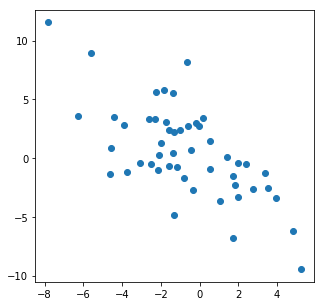

In [473]:
plt.figure(figsize=(5, 5))
Y = X.mm(W).add(b)
plt.scatter(Y[:, 0], Y[:, 1])

In [474]:
# your code here
X_V = torch.autograd.Variable(torch.Tensor(X), requires_grad=True)
W_V = torch.autograd.Variable(torch.Tensor(W), requires_grad=True)
B_V = torch.autograd.Variable(torch.Tensor(b), requires_grad=True)
optimizer = torch.optim.SGD([W_V, B_V], lr=0.1, momentum=0.9)
for i in range(0,100):
    optimizer.zero_grad()
    loss = f(X_V, W_V, B_V)
    loss.backward()
    optimizer.step()
    if i % 10 == 0:
        print('{}: {}'.format(i, f(X_V, W_V, B_V).data))
W = W_V.data
b = B_V.data

0: 10.561440467834473
10: 4.3883562088012695
20: 0.8428959846496582
30: 0.9408329129219055
40: 1.0060242414474487
50: 1.8850796222686768
60: 0.504711925983429
70: 0.4383833408355713
80: 0.28698092699050903
90: 0.25381773710250854


In [475]:
W_V

tensor([[-0.5852,  0.0859],
        [ 0.3940,  0.1002],
        [-0.0755,  0.2460],
        [-0.3016, -0.3325],
        [ 0.5672,  0.0046],
        [ 0.2590,  0.3879],
        [ 0.0873, -0.1912],
        [ 0.4155, -0.1138],
        [-0.2469,  0.2681],
        [ 0.0445, -0.3049]], requires_grad=True)

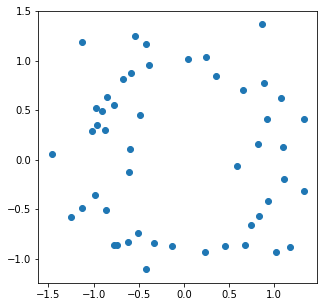

In [476]:
plt.figure(figsize=(5, 5))
Y = X.mm(W).add(b)
plt.scatter(Y[:, 0], Y[:, 1])

# Время писать нейросеть

## Загружаем данные

In [680]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

In [681]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [682]:
X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)
X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

Подсказка: нейросети крайне плохо обучаются, если подаваемые им на вход значения велики по модулю.
Поэтому перед обучением нейросети каждый признак независимо нормируют
(исключение – сверточные нейросети, там нормируют изображение поканально, а не попиксельно, но об этом потом).

Можно использовать разные нормировки.
Наиболее популярно вычитать среднее и делить на дисперсию (нужно внимательно подходить к этому методу,
когда выборочная дисперсия мала или равна нулю, и обрабатывать такие случаи отдельно).
Можно также вычитать медиану и делить на интерквартильный размах, масштабировать все данные в отрезок $[-1, 1]$, etc

Нужно реализовать свою нормировку данных здесь:

In [678]:
# your code here
pixel_means = torch.mean(X_train, dim=0)
pixel_std = torch.std(X_train, dim=0)
X_train = (X_train - pixel_means) / pixel_std
X_test = (X_test - pixel_means) / pixel_std


In [679]:
X_train.shape, X_test.shape

(torch.Size([1347, 64]), torch.Size([450, 64]))

## Определяем слои нейросети

In [568]:
class Module:
    def __init__(self):
        self.training = True
        self.children = []

    def forward(self, *input):
        raise NotImplementedError

    def parameters(self):
        """Returns list of parameters of module and its children."""
        res = []
        for submodule in self.children:
            res += submodule.parameters()
        for param in res:
            if not isinstance(param, Variable):
                raise Exception('Parameters must be Variables.')
        return res
    
    def zero_grad(self):
        """Sets gradients of all model parameters to zero."""
        for p in self.parameters():
            if p.grad is not None:
                p.grad.detach_()   # detachs gradient Variable from the computational graph
                p.grad.zero_()

    def train(self):
        """Sets module into train mode (for DropOut, BatchNorm, etc)."""
        self.training = True
        for submodule in self.children:
            submodule.train()

    def eval(self):
        """Sets module into evaluation mode."""
        self.training = False
        for submodule in self.children:
            submodule.eval()

In [709]:
class Dense(Module):
    def __init__(self, input_units, output_units):
        """A dense layer is a layer which performs a learned affine transformation:
        f(x) = W x + b
        """
        super(Dense, self).__init__()
        self.weights = torch.randn(input_units, output_units)*0.00001
        self.biases = torch.randn(1, output_units)*0.00001
        print(self.weights.shape, self.biases.shape)
        self.weights = Variable(self.weights, requires_grad = True)
        self.biases = Variable(self.biases, requires_grad = True)
        
    def parameters(self):
        return [self.weights, self.biases]
        
    def forward(self, input):
        """Performs an affine transformation:
        f(x) = W x + b
        input shape:  [batch, input_units]  (Variable)
        output shape: [batch, output units] (Variable)
        """
        # your code here       
        output = torch.matmul(input, self.weights)
        output = output  + self.biases
        return output

In [710]:
class ReLU(Module):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs."""
        super(ReLU, self).__init__()

    def parameters(self):
        return []  # ReLU has no parameters
    
    def forward(self, input):
        """Applies elementwise ReLU to [batch, num_units] Variable matrix."""
        # your code here
        output = torch.nn.functional.relu(input)
        return output

In [711]:
class LogSoftmax(Module):
    def __init__(self):
        super(LogSoftmax, self).__init__()

    def parameters(self):
        return []
        
    def forward(self, input):
        """Applies softmax to each row and then applies component-wise log.
        Input shape:  [batch, num_units] (Variable)
        Output shape: [batch, num_units] (Variable)
        """
        # your code here
        output = torch.nn.functional.log_softmax(input)
        return output

In [712]:
class MyNetwork(Module):
    def __init__(self, input_size, hidden_layers_size, hidden_layers_number, output_size):
        super(MyNetwork, self).__init__()

        network = []
        network.append(Dense(input_size, hidden_layers_size))
        network.append(ReLU())
        for i in range(hidden_layers_number - 1):
            network.append(Dense(hidden_layers_size, hidden_layers_size))
            network.append(ReLU())
        network.append(Dense(hidden_layers_size, output_size))
        network.append(LogSoftmax())

        self.children = network

    def forward(self, input):
        """Applies all layers of neural network to the input.
        Input shape:  [batch, num_units] (Variable)
        Output shape: [batch, num_units] (Variable)
        """
        # your code here
        output = input
        for layer in self.children:
            output = layer.forward(output)
        return output

In [713]:
X_train.shape[1]

64

In [714]:
network = MyNetwork(X_train.shape[1], 32, 1, 10)

torch.Size([64, 32]) torch.Size([1, 32])
torch.Size([32, 10]) torch.Size([1, 10])


## Определяем функцию потерь

In [715]:
def crossentropy(activations, target):
    """Returns negative log-likelihood of target under model
    represented by activations (log probabilities of classes).
    Activations shape: [batch, num_classes] (Variable)
    Target shape:      [batch]              (Variable)
    Output shape: 1 (scalar, Variable)
    """
    # your code here
    loss = -torch.sum(activations[np.arange(len(target)), target])
    return loss

## Оптимизатор SGD

In [716]:
class SGDOptimizer:
    def __init__(self, parameters, learning_rate):
        self.parameters = parameters
        self.learning_rate = learning_rate

    def step(self):
        """Make one optimization step for parameters in-place.
        Assumes that all parameters are Variable with computed gradient.
        """
        for param in self.parameters:
            param.data = param.data - self.learning_rate * param.grad.data

In [717]:
import torch.utils.data

In [718]:
def run_epoch(dataset, network, prefix='Test loss:', optimizer=None):
    # Change mode for all layers.
    if optimizer:
        network.train()
    else:
        network.eval()

    batch_size = 10
    batchgenerator = torch.utils.data.DataLoader(dataset, batch_size, True)
    avg_loss = 0
    for i, (batch_data, batch_target) in enumerate(batchgenerator):
        #print("batch_data: ", batch_data)
        #print("batch_target: ", batch_target)

        batch_output = network.forward(Variable(batch_data))
        batch_loss = crossentropy(batch_output, Variable(batch_target))
        batch_loss.backward()
        batch_loss = batch_loss.data.numpy()
        avg_loss += (batch_loss - avg_loss) / (i + 1)
        if optimizer:
            optimizer.step()
            network.zero_grad()
    print(prefix, avg_loss, flush=True)

In [762]:
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

network = MyNetwork(X_train.shape[1], 32, 1, 10)
sgd = SGDOptimizer(network.parameters(), 0.01)

num_epochs = 20
for i in range(num_epochs):
    run_epoch(train_dataset, network, 'Train loss:', sgd)
    run_epoch(test_dataset, network, 'Test loss:',  None)

torch.Size([64, 32]) torch.Size([1, 32])
torch.Size([32, 10]) torch.Size([1, 10])
Train loss: 23.00744956687645
Test loss: 23.052502822875972
Train loss: 21.108521518000845


/home/maxim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


Test loss: 15.765296300252277
Train loss: 10.013544907393275
Test loss: 5.031533193588256
Train loss: 6.610915092185698
Test loss: 2.5187732802497016
Train loss: 2.5746363162994377
Test loss: 1.8760148578219942
Train loss: 2.5320748117234957
Test loss: 1.2698424127366805
Train loss: 1.2021667180237945
Test loss: 1.08026032977634
Train loss: 1.0079155074225532
Test loss: 0.9394749641418456
Train loss: 0.8359256885669842
Test loss: 0.7756443606482611
Train loss: 0.7509635183546275
Test loss: 0.6718398465050591
Train loss: 0.5980838722652858
Test loss: 0.7267479843563504
Train loss: 0.679471782401756
Test loss: 0.5586263868543836
Train loss: 0.4605495029025606
Test loss: 0.5505016803741455
Train loss: 0.48743937986868374
Test loss: 0.479070912467109
Train loss: 0.3959339706986038
Test loss: 0.4546795050303142
Train loss: 0.3541888908103661
Test loss: 0.3975416395399306
Train loss: 0.3686563385857475
Test loss: 0.4531346956888835
Train loss: 0.5088110658857562
Test loss: 0.3134341028001574

## Больше оптимизаторов Б-гу Оптимизации!

In [813]:
class SGDMomentumOptimizer:
    def __init__(self, parameters, learning_rate=0.01, momentum=0.9):
        self.parameters = parameters
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.params_prev_step = parameters

    def step(self):
        """Make one optimization step for parameters in-place.
        Assumes that all parameters are Variable with computed gradient.
        http://ruder.io/optimizing-gradient-descent/index.html#stochasticgradientdescent
        """
        for param, param_prev in zip(self.parameters, self.params_prev_step):
            param.data = param.data + self.momentum*param.data - self.learning_rate * param.grad.data - self.momentum*param_prev.data
        self.params_prev_step = self.parameters

In [825]:
class RMSPropOptimizer:
    def __init__(self, parameters, learning_rate=0.01, beta=0.9, eps=1e-8):
        self.parameters = parameters
        self.learning_rate = learning_rate
        self.beta = beta
        self.eps = eps
        # your code here
        self.v = list(parameters)
        for i in range(len(self.v)):
            self.v[i] = self.v[i]*0.0

    def step(self):
        """Make one optimization step for parameters in-place.
        Assumes that all parameters are Variable with computed gradient.
        http://ruder.io/optimizing-gradient-descent/index.html#stochasticgradientdescent
        """
        for param, v in zip(self.parameters, self.v):
            grad = param.grad.data
            v.data = self.beta*v.data + (1-self.beta)*grad**2
            param.data -= self.learning_rate*grad/(v.data+self.eps)**(0.5)

In [865]:
class AdamOptimizer:
    def __init__(self, parameters, learning_rate=0.01, beta=0.999, gamma=0.9, eps=1e-8, align=False):
        self.parameters = parameters
        self.alpha = learning_rate
        self.beta = beta
        self.gamma = gamma,
        self.eps = eps
        self.step_state = 0
        self.correlation_v = 1.0
        self.correlation_mu = 1.0
        self.v = list(parameters)
        self.mu = list(parameters)
        self.align = align
        for i, param in enumerate(parameters):
            self.v[i] = torch.zeros_like(param.data)
            self.mu[i] = torch.zeros_like(param.data)

    def step(self):
        """Make one optimization step for parameters in-place.
        Assumes that all parameters are Variable with computed gradient.
        http://ruder.io/optimizing-gradient-descent/index.html#stochasticgradientdescent
        """
        self.step_state += 1
        for param, v, mu in zip(self.parameters, self.v, self.mu):
            grad = param.grad.data
            mu.mul_(self.gamma[0]).add_(1-self.gamma[0], grad)
            v.mul_(self.beta).addcmul_(1-self.beta, grad, grad)

            if self.align:
                self.correlation_v = 1 - self.beta**self.step_state
                self.correlation_mu = 1 - self.gamma**self.step_state

            demon = v.sqrt().add_(self.eps)
            step_size = -self.alpha * np.sqrt(self.correlation_v) / self.correlation_mu
            param.data.addcdiv_(step_size, mu, demon)

In [866]:
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

In [871]:
network = MyNetwork(X_train.shape[1], 32, 1, 10)
optim = AdamOptimizer(network.parameters(), learning_rate=0.01)

num_epochs = 20
for i in range(num_epochs):
    run_epoch(train_dataset, network, 'Train loss:', optim)
    run_epoch(test_dataset, network, 'Test loss:',  None)

torch.Size([64, 32]) torch.Size([1, 32])
torch.Size([32, 10]) torch.Size([1, 10])
Train loss: 11.550270118536776
Test loss: 5.362275097105238
Train loss: 4.615763681023208


/home/maxim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


Test loss: 2.3864012877146408
Train loss: 2.2009906706986597
Test loss: 2.0507345504230923
Train loss: 1.9690176824728651
Test loss: 1.6828252573808034
Train loss: 1.5922296852977187
Test loss: 1.152261851893531
Train loss: 1.1818954988762185
Test loss: 1.1787352045377097
Train loss: 1.1195643876437784
Test loss: 1.055274424288008
Train loss: 0.9647450057996645
Test loss: 0.9871711035569509
Train loss: 0.9347368639928324
Test loss: 0.9776430971092647
Train loss: 1.0075062125921252
Test loss: 0.8821025712622538
Train loss: 0.9343150010815373
Test loss: 0.8547069046232435
Train loss: 0.9448930954491642
Test loss: 0.7442688842614493
Train loss: 0.6313598758644531
Test loss: 0.6536732892195383
Train loss: 0.730219905464738
Test loss: 0.7545821925004321
Train loss: 0.7193002515644933
Test loss: 0.5574320859379237
Train loss: 0.5024581739609992
Test loss: 0.6003503017955355
Train loss: 0.5456442618811572
Test loss: 0.5918080064985486
Train loss: 0.5485679304917102
Test loss: 0.45088643514447

In [872]:
network = MyNetwork(X_train.shape[1], 32, 1, 10)
optim = SGDMomentumOptimizer(network.parameters(), 0.01)

num_epochs = 20
for i in range(num_epochs):
    run_epoch(train_dataset, network, 'Train loss:', optim)
    run_epoch(test_dataset, network, 'Test loss:',  None)

torch.Size([64, 32]) torch.Size([1, 32])
torch.Size([32, 10]) torch.Size([1, 10])
Train loss: 23.007320093225555
Test loss: 23.045870378282334


/home/maxim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


Train loss: 21.07345387494123
Test loss: 16.017906104193795
Train loss: 7.694070789549083
Test loss: 4.509342638651528
Train loss: 6.165715687363231
Test loss: 2.1390827920701763
Train loss: 2.017830583784314
Test loss: 1.3935632811652292
Train loss: 1.3598693918298796
Test loss: 1.0985609160529246
Train loss: 1.0622499201032851
Test loss: 1.0896295653449166
Train loss: 1.5846584814566151
Test loss: 1.0422496848636202
Train loss: 0.943475428333989
Test loss: 0.7767877790662979
Train loss: 0.6805328192534272
Test loss: 0.6827105257246229
Train loss: 0.6803910590984206
Test loss: 0.5683909098307292
Train loss: 0.4746061024842437
Test loss: 0.5073436154259574
Train loss: 0.46955177695662886
Test loss: 0.45588010152180997
Train loss: 0.4244313946476688
Test loss: 0.4234677791595459
Train loss: 0.33412643538580994
Test loss: 0.43042678833007825
Train loss: 0.3495713357572204
Test loss: 0.2996117062038845
Train loss: 0.24544976375721123
Test loss: 0.29370762507120773
Train loss: 0.2260241755

In [873]:
network = MyNetwork(X_train.shape[1], 32, 1, 10)
optim = RMSPropOptimizer(network.parameters())

num_epochs = 20
for i in range(num_epochs):
    run_epoch(train_dataset, network, 'Train loss:', optim)
    run_epoch(test_dataset, network, 'Test loss:',  None)

torch.Size([64, 32]) torch.Size([1, 32])
torch.Size([32, 10]) torch.Size([1, 10])
Train loss: 9.556692511064032
Test loss: 3.8225896120071403


/home/maxim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


Train loss: 2.346870297414286
Test loss: 2.539155358407233
Train loss: 1.5078265450618886
Test loss: 1.4906566636429897
Train loss: 1.1303135281911612
Test loss: 2.4093160609404247
Train loss: 0.8385739331720051
Test loss: 1.8621725176771484
Train loss: 0.772095270137544
Test loss: 1.3677793297502732
Train loss: 0.6052298207111934
Test loss: 1.3916612995167572
Train loss: 0.5064556025796467
Test loss: 1.3269052647882038
Train loss: 0.4073336012351017
Test loss: 1.2806157026853828
Train loss: 0.3896139399320991
Test loss: 0.8844823828587931
Train loss: 0.3874978173938062
Test loss: 0.8744230279492006
Train loss: 0.28329865074440563
Test loss: 0.8986197074254354
Train loss: 0.24777853150886514
Test loss: 0.685988880776697
Train loss: 0.24760448968520873
Test loss: 0.7980573491917717
Train loss: 0.16714099364148252
Test loss: 1.151031160934104
Train loss: 0.12342461645603177
Test loss: 0.7677819591429499
Train loss: 0.2168033082314112
Test loss: 0.5954013261530136
Train loss: 0.1313406726

## Эксперименты с DropOut

Этот пункт обязателен к выполнению.
Для того, чтобы получить бонусный балл за этот пункт, нужно эффективно реализовать DropOut:
не вычислять активации выкинутых нейронов, прежде чем их обнулить.

In [881]:
class DenseWithDropOut(Module):
    def __init__(self, input_units, output_units, dropout_rate, nonlinearity, mode):
        """A dense layer is a layer which performs a learned
        affine transformation and applies dropout:
        m ~ Bernoulli(1 - p, size=output_units)
        f(x) = g(W x + b) o m
        """
        super(DenseWithDropOut, self).__init__()
        self.dropout_rate = dropout_rate
        self.nonlinearity = nonlinearity
        # initialize weights with small random numbers from normal distribution
        self.input_u = input_units
        self.output_u = output_units
        self.mode = mode
        self.weights = torch.randn(input_units, output_units)*0.00001  # your code here\n",
        self.biases = torch.randn(1, output_units)*0.00001   # your code here\n",
        self.weights = Variable(self.weights, requires_grad = True)
        self.biases = Variable(self.biases, requires_grad = True)
    def parameters(self):
        return [self.weights, self.biases]
        
    def forward(self, input):
        """Performs an affine transformation with dropout.
        In training mode:
        m ~ Bernoulli(1 - p, size=output_units)
        f(x) = g(W x + b) o m
        In evaluation mode:
        f(x) = g(W x + b) (1 - p)
        input shape:  [batch, input_units]  (Variable)
        output shape: [batch, output units] (Variable)
        """
        # your code here
        if self.training:
            if self.mode != 0:
                input, in_indx = input[0], input[1]
                weights = self.weights.index_select(0, in_indx)
            else:
                weights = self.weights
            batch = input.shape[0]
            n = self.output_u
            output = Variable(torch.zeros(batch, n), requires_grad = False)
            p = 1-self.dropout_rate
            selected_indexes = Variable(torch.from_numpy(np.random.choice(n, np.random.binomial(n-1, p)+1, replace=False)))
            selected_weights = weights.index_select(1, selected_indexes)
            selected_biases = self.biases.index_select(1, selected_indexes)
            if self.mode==2:
                output[:, selected_indexes] = self.nonlinearity(torch.matmul(input, selected_weights) + selected_biases)
            else:
                output = (self.nonlinearity(torch.matmul(input, selected_weights) + selected_biases), selected_indexes)
        else:
            output = self.nonlinearity(torch.matmul(input, self.weights) + self.biases)*(1-self.dropout_rate)
        return output

Проверяем, верно ли, что полносвязная сеть с dropout работает быстрее, чем обычная полносвязная сеть, поскольку на каждом проходе вычисляются произведения матриц меньшего размера.

In [882]:
width = 2000
network1 = [
    DenseWithDropOut(width, width, 0.9, lambda x: ReLU().forward(x), mode = 0),
    DenseWithDropOut(width, width, 0.9, lambda x: ReLU().forward(x), mode = 1),
    DenseWithDropOut(width, width, 0.9, lambda x: ReLU().forward(x), mode = 1),
    DenseWithDropOut(width, 1, 0, lambda x: x, mode = 2)
]
network2 = [
    Dense(width, width),
    ReLU(),
    Dense(width, width),
    ReLU(),
    Dense(width, width),
    ReLU(),
    Dense(width, 1)
]
X = torch.randn(10000, width)

# check whether DenseWithDropOut works faster than Dense
def test_network(network):
    x = Variable(X)
    for layer in network:
        x = layer.forward(x)
    x.mean().backward()
    for layer in network:
        x = layer.zero_grad()

test_network(network1)
%timeit test_network(network1)
%timeit test_network(network2)

torch.Size([2000, 2000]) torch.Size([1, 2000])
torch.Size([2000, 2000]) torch.Size([1, 2000])
torch.Size([2000, 2000]) torch.Size([1, 2000])
torch.Size([2000, 1]) torch.Size([1, 1])
345 ms ± 20 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.12 s ± 223 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Для более узких слоев, меньших dropout rate и меньших размеров батча увеличение производительности не настолько существенно или может вообще отсутствовать.